In [2]:
import numpy as np
from classy import Class

lcdm = Class()
lcdm.set({
    'output': 'mPk',
    'non linear': 'none',
    'P_k_max_1/Mpc' : 150,
})
lcdm.compute()
ks = np.logspace(-3, 2, 1000)

xis = [0.05, 0.1, 0.2, 0.3, 0.4]
logas = [-2, -1, 0, 1, 2]
pks_xi = []
pks_a = []

for xi in xis:
    pdm = Class()
    pdm.set(({
        'output': 'mPk',
        'non linear': 'none',
        'P_k_max_1/Mpc' : ks[-1],
        'f_idm': 1,
        'nindex_idm_dr': 0,
        'idr_nature': 'free_streaming',
        'a_idm_dr': 10 ** 0,
        'xi_idr': xi,
    }))
    pdm.compute()
    pks_xi.append(np.vectorize(pdm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))

for loga in logas:
    pdm = Class()
    pdm.set(({
        'output': 'mPk',
        'non linear': 'none',
        'P_k_max_1/Mpc' : ks[-1],
        'f_idm': 1,
        'nindex_idm_dr': 0,
        'idr_nature': 'free_streaming',
        'a_idm_dr': 10 ** loga,
        'xi_idr': 0.3,
    }))
    pdm.compute()
    pks_a.append(np.vectorize(pdm.pk_lin)(ks * lcdm.h(), 0) / np.vectorize(lcdm.pk_lin)(ks * lcdm.h(), 0))

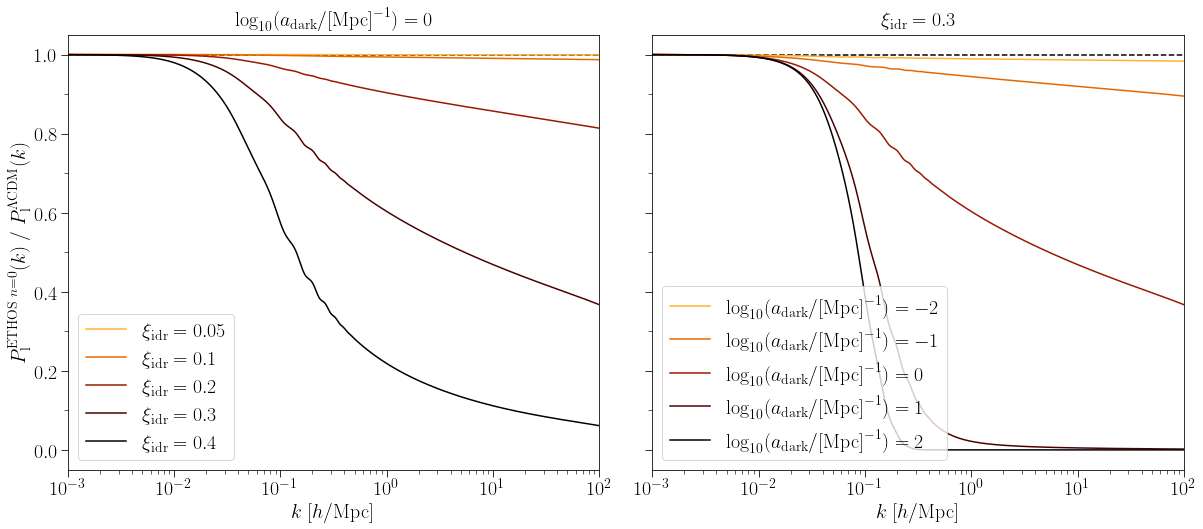

In [8]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pl
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True


fontsize = 20
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth (20)


ax1.set_title(r"$\log_{10}(a_\mathrm{dark}/\mathrm{[Mpc]}^{-1})=0$", fontsize=fontsize, pad=10)
ax1.set_ylabel(r"$P_\mathrm{l}^{\mathrm{ETHOS}\;n=0}(k)\;/\;P_\mathrm{l}^{\Lambda\mathrm{CDM}}(k)$", fontsize=fontsize)
ax1.set_xlabel(r"$k\; [h\mathrm{/Mpc}]$", fontsize=fontsize)
ax1.set_xlim(ks[0], ks[-1])
ax1.set_ylim(-0.05,1.05)
ax1.set_xscale("log")

ax2.set_title(r"$\xi_\mathrm{idr}=0.3$", fontsize=fontsize, pad=10)
ax2.set_xlabel(r"$k\; [h\mathrm{/Mpc}]$", fontsize=fontsize)
ax2.set_xlim(ks[0], ks[-1])
ax2.set_ylim(-0.05,1.05)
ax2.set_xscale("log")

ax1.hlines(1, ks[0], ks[-1], linestyles="dashed", color="black")
ax2.hlines(1, ks[0], ks[-1], linestyles="dashed", color="black")

colours = pl.cm.afmhot(np.linspace(0,0.6,len(xis)))
for i, pk_xi in enumerate(pks_xi):
    ax1.plot(
        ks,
        pk_xi,
        label=r"$\xi_\mathrm{idr}=%s$" % xis[i],
        color=colours[len(xis)-1-i]
    )

colours = pl.cm.afmhot(np.linspace(0,0.6,len(logas)))
for i, pk_a in enumerate(pks_a):
    ax2.plot(
        ks,
        pk_a,
        label=r"$\log_{10}(a_\mathrm{dark}/\mathrm{[Mpc]}^{-1})=%s$" % logas[i],
        color=colours[len(logas)-1-i]
    )

ax1.legend(fontsize=fontsize)
ax2.legend(fontsize=fontsize, loc="lower left")
ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ticks_labels = ["$0.0$", "$0.2$", "$0.4$", "$0.6$", "$0.8$", "$1.0$"]
ticks_minor = [0.1, 0.3, 0.5, 0.7, 0.9]
empty = ["", "", "", "", "", ""]
empty_minor = ["", "", "", "", ""]
ax1.set_yticks(ticks, ticks_labels, fontsize=fontsize)
ax1.set_yticks(ticks_minor, empty_minor, minor=True)
ax2.set_yticks(ticks, empty, fontsize=fontsize)
ax2.set_yticks(ticks_minor, empty_minor, minor=True)
ax1.tick_params(length=7, labelsize=fontsize)
ax1.tick_params(length=4, labelsize=fontsize, which="minor")
ax2.tick_params(length=7, labelsize=fontsize)
ax2.tick_params(length=4, labelsize=fontsize, which="minor")

plt.subplots_adjust(wspace=0.1)

# fig.savefig("/home/justus/Uni/plots/pk_lin/ethos.pdf", bbox_inches = "tight")